# Classwork Example for 09 10 2020



In this directory, I have included a FITS file containing an image of mm-wave emission from an HII region. 

You can read FITS data into python using the astropy package. 

I have displayed the image below, in its native units of Jy / beam.

(1) In the header, find where the beam parameters are listed in the image header, and overplot the correct image beam size

(2) Calculate and apply the conversion from Jy/beam to K

(3) Make a new plot showing the image in units of K, and re-label the color bar with the appropriate units. 




In [ ]:
import numpy as np                          # I use this for maths and sometimes arrays.
                                            # "np" is just an abbreviation since we call this package so often!
import pylab                                # I use this for arrays and plotting sometimes
import matplotlib
import matplotlib.pyplot as plt                    # Standard plotting package
import scipy

from astropy import units as u              # This one helps with unit conversion



                                            # Super important!! 
                                            # This embeds plots in the Jupyter window 
                                            # (instead of showing them as pop-ups)
%matplotlib inline                             

plt.rc('font', family='sans-serif')  # Set plot fonts
plt.rc('text', usetex=True)      
#plt.rc('text', usetex=False)        # This is a quick fix if you don't have latex on your computer



## Solution:

Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


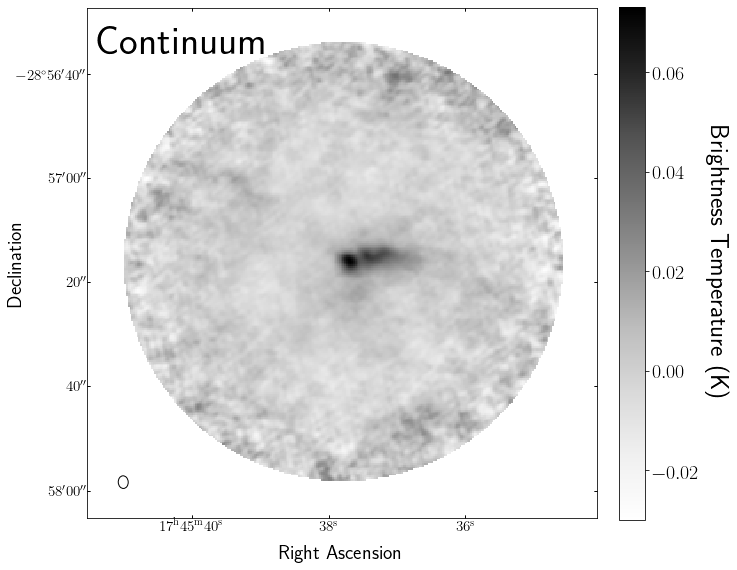

In [13]:
import astropy.io.fits as fits              # I use this to import FITS images. 
                                            # Astropy should be included in your conda installation
from astropy.wcs import WCS                 # This one helps us add coordinates to images
import matplotlib.patches as patches

path = 'H8_continuum.pbcor.fits'# This string is not just the name of a file, but its full address.
                                # If, like this file, it is in the same directory as your notebook,
                                # you can specify just the filename. If it lives elsewhere you need
                                # to give a relative (e.g., data/name.fits or ../directory/name.fits)
                                # or absolute (e.g., EACMills/Project/Data/name.fits) path to the file.


                                # The fits images we will work with consist of two main parts:
                                # (1) An array of 2-4 dimensions that holds the value of each image pixel 
                                # (2) A "header" which contains a summary of information associated with this array                


image = fits.getdata(path)      # This command reads in the data array part of the fits file, so we can manipulate it 
                                # like any other python array
    
header = fits.getheader(path)   # This command reads in the header, which consists of a series of variables 
                                # and associated values

pixel = header['CDELT1']        # The pixel scale of the image is a useful quantity to get from the header
bmaj = header['BMIN']           # Major axis (in degrees) 
bmin = header['BMAJ']           # Minor axis (in degrees)
bpa = header['BPA']
freq = header['RESTFRQ']/1.0e9    
w1 = WCS(header)                # This command grabs information from the header, but focuses just on the
                                # part of the header that tells you how pixel coordinates correspond to 
                                # sky coordinates        
w1 = w1.dropaxis(3)
w1 = w1.dropaxis(2)

image_2D = pylab.squeeze(image) #squeeze gets rid of all axes with length=1.

Jy_to_K =  1.224e6 / (freq)**2 /bmin / bmaj / 3600**2   # This formula uses the RJ equation but takes 
                                                        # beam size in units of arcsecond ^2
                                                        # and freq in units of GHz. 



fig1 = pylab.figure(1,figsize=(10,10))       # We will make this figure #1 and give it a size of 10x10

                                             # We also want to make sure that our image is plotted with sky coordinates
ax1 = pylab.subplot(projection=w1)           # We do this by specifying a projection (the wcs from the previous cell)
RA = ax1.coords[0]
Dec = ax1.coords[1]

im1 = plt.imshow(image_2D*Jy_to_K,cmap='Greys')     # We have a lot of control over how we plot the image.
                                            # Note that each of these options will plot on top of any 
                                            # previously-displayed image. To display an image as a
                                            # new figure, you need to define a new figure command, 
                                            # with a unique figure number, e.g, fig2 = pylab.figure(2)
                                            
                                            # The options below show other ways to customize this figure 
RA.set_ticks(size=-3)                       # Change the length of the tick marks 
Dec.set_ticks(size=-3)                      # (negative values place ticks inside the bounding box)

pylab.xlabel('Right Ascension',fontsize=20,labelpad=1)                              # Label the x-axis
pylab.ylabel('Declination',fontsize=20,labelpad=0)                                  # Label the y-axis
ax1.tick_params(axis = 'both', which = 'major', labelsize = 15)                     # Increase tick label font
pylab.annotate(s='Continuum',fontsize=40,xy=(0.02,0.91),xycoords="axes fraction")   # Add a label in the figure
cb=pylab.colorbar(im1,fraction=0.046,pad=0.04) # Define a color bar
cb.set_label(label='Brightness Temperature (K)',fontsize=25,rotation=270,labelpad=30) # Add a colorbar label
cb.ax.tick_params(which = 'major', labelsize = 20);                                 # Increase colorbar fonts

#Plot the beam


ax1.add_patch(
            patches.Ellipse(
                (20,20),                            # central position to plot
                bmaj/pixel,bmin/pixel,angle=bpa+90, # ellipse parameters
                fill=False,                         # remove background fill
                color='black'
            ))



# What does Brightness Temperature Mean?

So, this is a super small temperature, what gives?

In general, for sources of thermal emission, the brightness temperature will be less than the source temperature.

Note that this all goes out the window when you consider nonthermal emission: masers can have brightness temepratures of millions of K, and the same is true for nonthermal continuum emission like synchrotron. Fun fact: this is why these two types of emission sources are some of the only things you can observe with very long baseline interferometry, because with such high resolutions (a tiny, tiny beam) and the sensitivity of current observatories you basically can **only** observe sources with nonthermally-large brightness temperatures! So, the event horizon telescope is fine looking at (synchrotron) emission from black holes, but it won't be thermally imaging exoplanets any time soon.

Sometimes, the brightness temperature is a good measure of the true gas kinetic temperature. A good example of this is the CO molecule, which is very abundant, and so its emission is often optically-thick. In this case, as we saw, $S_\nu$ = $B_\nu$ and the brightness temperature really is the gas temperature (as long as the source size is not much smaller than the resolution of your telescope, in which case you are averaging the source temperature with the temperature of empty space). 

In this case, we are probably looking at relatively low-density emission that is very far from being optically thick (we will talk later about the specific mechanisms of continuum emission from ionized gas: it turns out that free-free emission becomes more optically thick with decreasing frequency). Observations at 100 GHz are at the very high end of where we typically observe free-free emission; it more characteristically peaks around 10 GHz. 

If our HII region were optically-thick ($\tau \rightarrow \infty$), the brightness temperature would approach the electron temperature $T_e$ which for HII regions is characteristically around $10^4$ K. However, for the limiting case we are considering ($\tau \rightarrow 0$), $T_B \rightarrow \tau T_e$ and we end up with a brightness temperature that is much less than the "true" temperature of the source. 
